In [67]:
import pandas as pd
import numpy as np

In [26]:
pd_df = pd.read_csv("data/population_fertility.csv")

In [27]:
pd_df.columns = ['Index', 'Variant', 'Country', 'Year',
       'Population', 'Fertility']
pd_df["Population"]= pd_df["Population"].str.replace(" ", "").astype(int)


In [28]:
pd_df.dtypes

Index           int64
Variant        object
Country        object
Year            int64
Population      int64
Fertility     float64
dtype: object

In [36]:
df_y = pd_df[pd_df.Year == 1950]

In [38]:
df_y["pop_per"]=df_y["Population"]/df_y["Population"].sum()

/tmp/ipykernel_35354/3240769087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y["pop_per"]=df_y["Population"]/df_y["Population"].sum()


In [48]:
sort_y = df_y.sort_values("Fertility").reset_index()
sort_y["pop_per_cumsum"] = sort_y[["pop_per"]].cumsum()

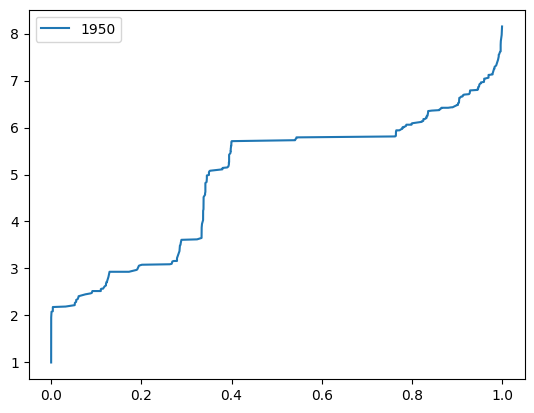

In [58]:
import matplotlib.pyplot as plt

plt.plot(sort_y["pop_per_cumsum"],sort_y["Fertility"],label='1950')
plt.legend()
plt.show()

/tmp/ipykernel_35354/2012041662.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y["pop_per"]=df_y["Population"]/sum_pop
/tmp/ipykernel_35354/2012041662.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y["pop_per"]=df_y["Population"]/sum_pop
/tmp/ipykernel_35354/2012041662.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

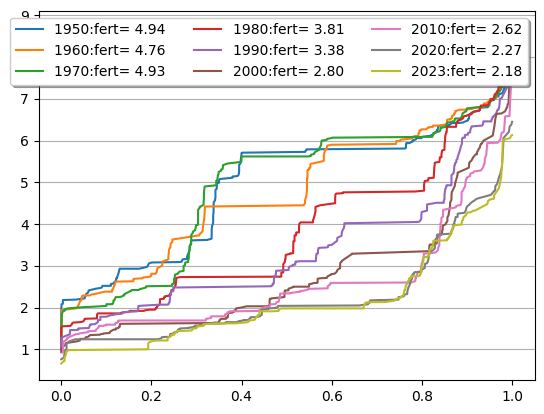

In [78]:
years = [1950,1960,1970,1980,1990,2000,2010,2020,2023]

for year in years:
    df_y = pd_df[pd_df.Year == year]
    sum_pop = df_y["Population"].sum()
    average_fert = "{:.2f}".format(np.average(df_y["Fertility"],weights = df_y["Population"]))
    df_y["pop_per"]=df_y["Population"]/sum_pop
    sort_y = df_y.sort_values("Fertility").reset_index()
    sort_y["pop_per_cumsum"] = sort_y[["pop_per"]].cumsum()
    plt.plot(sort_y["pop_per_cumsum"],sort_y["Fertility"],label= str(year) + f": fert= {average_fert}" )
plt.legend(loc='upper right',ncol=3, fancybox=True, shadow=True)
plt.grid(axis='y')
plt.show()


In [95]:
sort_y.tail(120).tail(30)

,index,Index,Variant,Country,Year,Population,Fertility,pop_per,pop_per_cumsum
207,3699,6590,Estimates,Liberia,2023,5433,3.95,0.000674,0.868458
208,517,3112,Estimates,Madagascar,2023,30813,3.97,0.003825,0.872283
209,369,2964,Estimates,Ethiopia,2023,127028,3.99,0.015767,0.888050
210,3403,6294,Estimates,Gambia,2023,2667,4.01,0.000331,0.888381
211,1997,4666,Estimates,Equatorial Guinea,2023,1825,4.08,0.000227,0.888607
212,1405,4000,Estimates,Zambia,2023,20430,4.10,0.002536,0.891143
213,1849,4518,Estimates,Congo,2023,6108,4.16,0.000758,0.891901
214,3181,6072,Estimates,Burkina Faso,2023,22766,4.19,0.002826,0.894727
215,4291,7182,Estimates,Togo,2023,9196,4.19,0.001141,0.895869
216,3551,6442,Estimates,Guinea,2023,14229,4.22,0.001766,0.897635


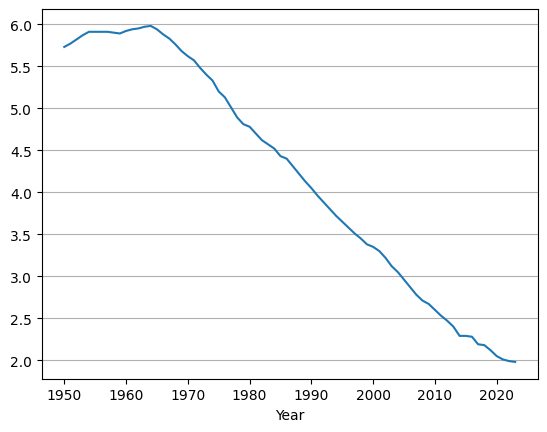

In [88]:
pd_df[pd_df.Country == "India"].set_index("Year")["Fertility"].plot()
plt.grid(axis='y')


In [84]:
pd_df.Country.unique()

array(['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya',
       'Madagascar', 'Malawi', 'Mauritius', 'Mayotte', 'Mozambique',
       'Réunion', 'Rwanda', 'Seychelles', 'Somalia', 'South Sudan',
       'Uganda', 'United Republic of Tanzania', 'Zambia', 'Zimbabwe',
       'Angola', 'Cameroon', 'Central African Republic', 'Chad', 'Congo',
       'Democratic Republic of the Congo', 'Equatorial Guinea', 'Gabon',
       'Sao Tome and Principe', 'Algeria', 'Egypt', 'Libya', 'Morocco',
       'Sudan', 'Tunisia', 'Western Sahara', 'Botswana', 'Eswatini',
       'Lesotho', 'Namibia', 'South Africa', 'Benin', 'Burkina Faso',
       'Cabo Verde', "Côte d'Ivoire", 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 'Niger',
       'Nigeria', 'Saint Helena', 'Senegal', 'Sierra Leone', 'Togo',
       'Kazakhstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan',
       'Uzbekistan', 'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, Taiwan